In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm;

%matplotlib inline



In [2]:
#gathering the data
df = pd.read_csv('./AB_NYC_2019.csv' )

## Take A Look At The Data(Assess)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]
print('number of rows equals to {} '.format(num_rows))
print('number of columns equals to {}'.format(num_cols))

number of rows equals to 48895 
number of columns equals to 16


In [5]:
#set of columns that have no missing values
no_nulls = set(df.columns[df.isnull().sum() == 0])
no_nulls

{'availability_365',
 'calculated_host_listings_count',
 'host_id',
 'id',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'room_type'}

In [6]:
#set of columns that have more than 75% if their values missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

set()

In [7]:
null_cols = set(df.columns[df.isnull().sum() != 0])
null_cols

{'host_name', 'last_review', 'name', 'reviews_per_month'}

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#check the data types and check if any columns are of different data types that you would expect
#check the missing values for every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

we have missing values in the name and host_name columns, but the id and host_id there're no missing values, so in our investigation, I will depend on the id's columns.

the last review column also has missing values, so I will drop it later because, I will not use it.

the reviews per month column has missing values,I will deal with it later.


In [10]:
#discover the number of unique values for categorical columns
print(df.minimum_nights.nunique(), df.id.nunique(), df.host_id.nunique())
print(df.neighbourhood_group.nunique(), df.neighbourhood.nunique())
print(df.room_type.nunique(), df.availability_365.nunique())
print(df.price.nunique(), df.number_of_reviews.nunique())

109 48895 37457
5 221
3 366
674 394


Text(0.5, 0, 'neighbourhood group')

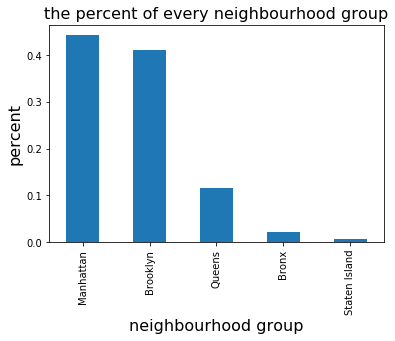

In [76]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(6,4))
count_neigh = df.neighbourhood_group.value_counts()
(count_neigh/df.shape[0]).plot(kind='bar');
plt.title('the percent of every neighbourhood group', fontsize = 16)
plt.ylabel('percent', fontsize = 16)
plt.xlabel('neighbourhood group', fontsize = 16)


Text(0, 0.5, 'the percent of every room type')

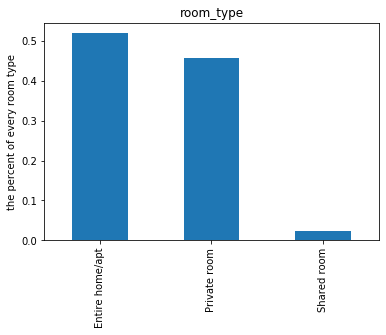

In [60]:
#visualize the categorical values for the room_type
count_room = df.room_type.value_counts()
(count_room/df.shape[0]).plot(kind='bar');
plt.title('room_type')
plt.ylabel('the percent of every room type')

## Clean

In [13]:
def clean(df):
    '''
    cleaning the dataframe by converting the data types for the id and host_id to Object,
    filling the reviews per month with 0 value
    filling the missing values in the names cloumns with special characters,
    then removing the last_review column, I'll not use it in my analysis
    
    input -> the dataframe which was generated from the dataset
    output -> a cleaned dataframe
    '''
    
    df[['host_id', 'id']] = df[['host_id', 'id']].astype('str')
    df['reviews_per_month'].fillna(0,inplace = True)
    df['name'].fillna("$$$",inplace=True)
    df['host_name'].fillna("$$$",inplace=True)
    df.drop(['last_review'],axis=1,inplace=True)
    return df


In [14]:
df = clean(df)

## Business Questions

* how many hosts are in every neighbourhood_group? what are the top host ids who have the highest number of rooms in every      neighbourhood_group?
* What are the features that affect on the price? can we predict the price from these features? 
* Which neighbourhood has the highest number of reviews, and the highest number of rooms for every neighbourhood group? what can we learn from the results?

### Question 1


* **how many hosts are in every neighbourhood_group? what are the top host ids who have the highest number of rooms in every neighbourhood_group?** 

To answer this question, we will use the host_id, neighbourhood_group columns

         host_id neighbourhood_group  count
13542  219517861           Manhattan    327
1234   107434423           Manhattan    230
         host_id neighbourhood_group  count
4947   137358866              Queens     79
11025   19303369              Queens     29
        host_id neighbourhood_group  count
33560   7503643            Brooklyn     52
18222  26377263            Brooklyn     35
        host_id neighbourhood_group  count
20819    310670               Bronx     13
15674  23878336               Bronx     10
        host_id neighbourhood_group  count
764   104812805       Staten Island      8
5041  137999892       Staten Island      7


Text(0.5, 0, 'the neighbourhood group')

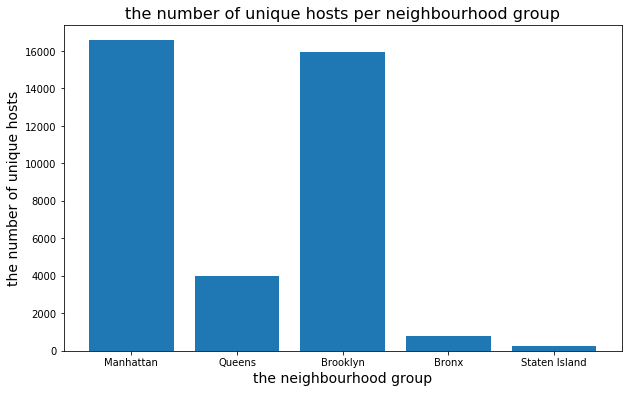

In [75]:
df_host_area = df.groupby(['host_id', 'neighbourhood_group']).count()['id'].to_frame().reset_index()
df_host_area.sort_values('id', ascending = False, inplace =True)
df_host_area.rename(columns = {'id':'count'}, inplace = True)
    
#create a list of the names of the neighbourhood groups
neigh_list = df_host_area['neighbourhood_group'].unique().tolist()
    
#create a dictionary to hold the name od the group with the count of unique hosts
count_unique_host = {}

i = 0
for group in neigh_list:
    df_group = df_host_area[df_host_area.neighbourhood_group == group]
    count_unique_host[group] = df_group.shape[0]
        
    #print the first two hosts ids in every group
    print(df_group.head(2))
   
    #plotting the number of unique hosts per group
plt.figure(figsize=(10,6))
    
plt.bar(count_unique_host.keys(), count_unique_host.values())
plt.title('the number of unique hosts per neighbourhood group', fontsize =16)
plt.ylabel('the number of unique hosts', fontsize = 14)
plt.xlabel('the neighbourhood group', fontsize =14)

In [81]:
#Analyzing the number of rooms for every host and neighbourhood group
def unique_hosts(df, neighbour_count = 5, plot = True):
    
    '''
    inputs:
    df -> the dataframe of all the dataset after cleaning
    neihbour_count -> the number of neighbourhood groups, here in this dataset equals to 5
    plot-> True if we needs to making plots
    
    output:
    print(the top 2 host id's)
    the count of unique hosts in every neighbourhood group
    
    plot:
    the top 10 host's ids who have the highest number of rooms in every group
    the number of unique hosts per neighbourhood group
    
    '''
    #create a new dataframe with the number of listings for every host_id in every group
    df_host_area = df.groupby(['host_id', 'neighbourhood_group']).count()['id'].to_frame().reset_index()
    df_host_area.sort_values('id', ascending = False, inplace =True)
    df_host_area.rename(columns = {'id':'count'}, inplace = True)
    
    #create a list of the names of the neighbourhood groups
    neigh_list = df_host_area['neighbourhood_group'].unique().tolist()
    
    #create a dictionary to hold the name od the group with the count of unique hosts
    count_unique_host = {}
    #create a subplots
    fig, axs = plt.subplots(neighbour_count+1,1, figsize = (20,30))
    fig.subplots_adjust(hspace=1)

    i = 0
    for group in neigh_list:
        df_group = df_host_area[df_host_area.neighbourhood_group == group]
        count_unique_host[group] = df_group.shape[0]
        
        #print the first two hosts ids in every group
        print(df_group.head(3))
        #plot the top 10 hosts with the number of their listings
        if plot:
            axs[i].bar(df_group.head(10)['host_id'], df_group.head(10)['count'])
            axs[i].set_title('the top 10 hosts ids who have the highest number of rooms in {} '.format(group))
            axs[i].set_ylabel('the number of rooms for every host')
            axs[i].set_xlabel('host id')
            i += 1
    #plotting the number of unique hosts per group
    if plot:
        axs[neighbour_count].bar(count_unique_host.keys(), count_unique_host.values())
        axs[neighbour_count].set_title('the number of unique hosts per neighbourhood group')
        axs[neighbour_count].set_ylabel('the number of unique hosts')
        axs[neighbour_count].set_xlabel('the neighbourhood group')
    
    return count_unique_host    

         host_id neighbourhood_group  count
13542  219517861           Manhattan    327
1234   107434423           Manhattan    230
20509   30283594           Manhattan    121
         host_id neighbourhood_group  count
4947   137358866              Queens     79
11025   19303369              Queens     29
16072  242962235              Queens     23
         host_id neighbourhood_group  count
33560    7503643            Brooklyn     52
18222   26377263            Brooklyn     35
2766   119669058            Brooklyn     34
        host_id neighbourhood_group  count
20819    310670               Bronx     13
15674  23878336               Bronx     10
20608  30509656               Bronx      8
        host_id neighbourhood_group  count
764   104812805       Staten Island      8
5041  137999892       Staten Island      7
788   104927746       Staten Island      7


{'Manhattan': 16578,
 'Queens': 3983,
 'Brooklyn': 15966,
 'Bronx': 789,
 'Staten Island': 256}

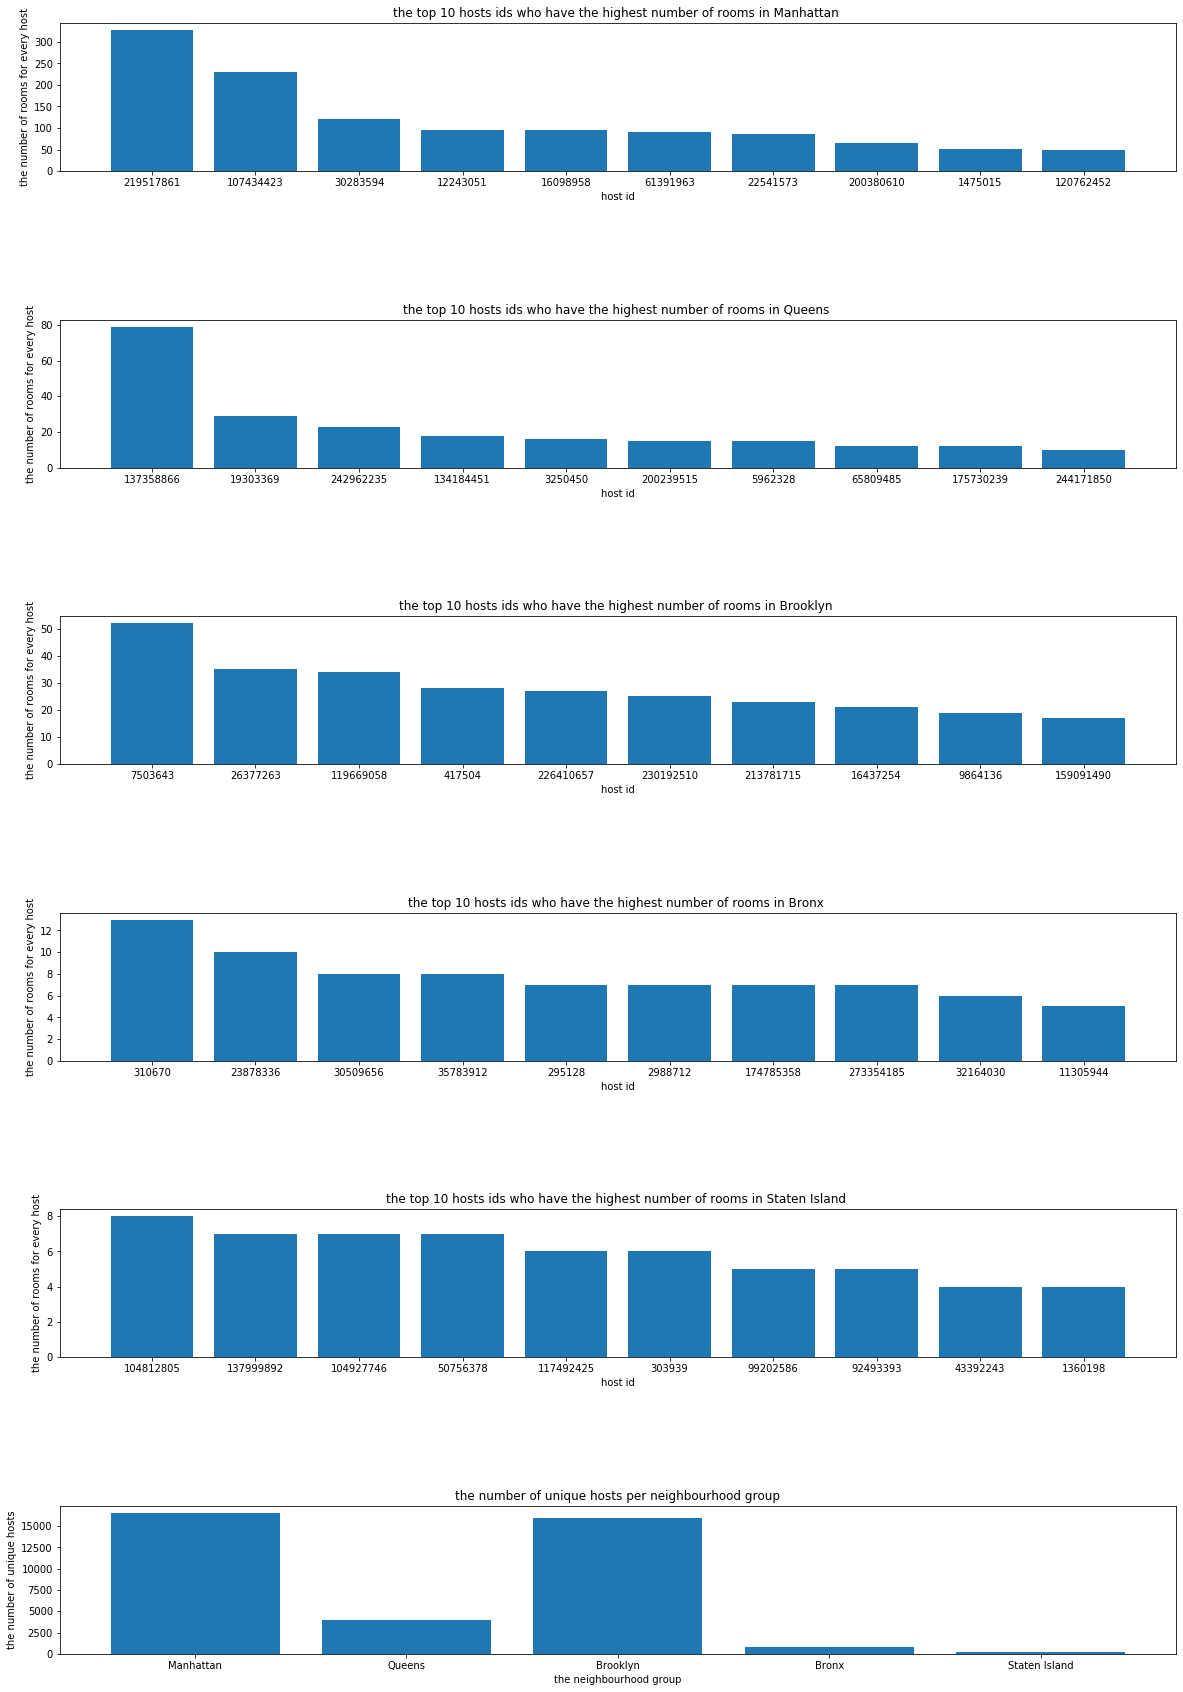

In [82]:
unique_hosts(df)

We can learn from these plots alot, that *Manhattan* has got a host with id `219517861` who has more than 300 rooms in it, while in *Queens* the host with id `137358866` has the highest number of rooms(around 80), In *Broklyn* the host with id `7503643` has 52 rooms, In *Bronx* and *Staten Island*, the hosts with the ids `310670` `104812805` has the highest number of rooms respectively.

The last plot shows the number of unique hosts in every neighbourhood group, In *Manhattan* which has the highest number of rooms and the highest number of unique hosts, the number of unique hosts in it equals to `16578`, aftrer it comes Brookyn with `15966`. 

### Question 2

* **What are the features that affect on the price? can we predict the price from these features?**

To answer this question, we'll explore the relationship between price and the other features, in Bivariate, multivariate explorations.

## Analyze
### Bivariate Exploration

#### Price Distribution in every neighbourhood group

In [17]:
def plot_price_group(df):
    '''
    This function for plotting the price distribution for every neighbourhood group
    
    input -> the dataframe
    output -> plotting the price distribution on average for every  neighbourhood group based on the neighbourhoods
    '''
    neigh_list = df['neighbourhood_group'].unique().tolist()
    fig,axs = plt.subplots(5,1,figsize=(20,20) )
    fig.subplots_adjust(hspace=1)

    i = 0
    for group in neigh_list:
        df_price = df[df.neighbourhood_group==group][["neighbourhood","price"]]
        df_price = df_price.groupby("neighbourhood").mean()
        sns.distplot(df_price, ax = axs[i])
        axs[i].set_xlabel(' The price in {}'.format(group))
        axs[i].set_title('the price distribution in {}'.format(group))
        i += 1


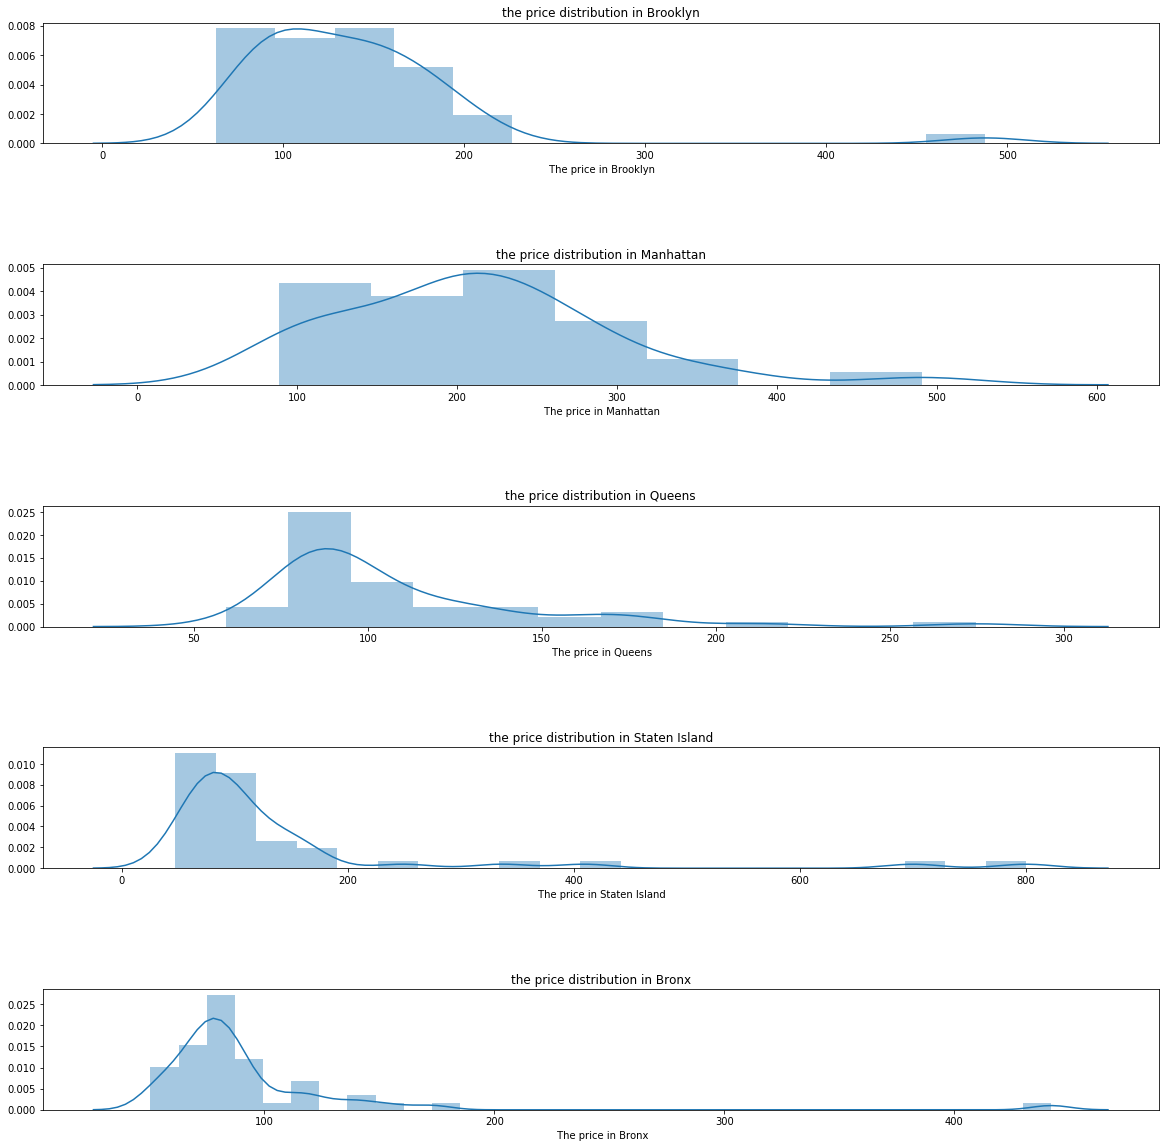

In [18]:
plot_price_group(df)

 it was clear that there’s a difference in the price in some neighborhood group, that the price range in Manhattan is from 90 to 370 on average, and in Brooklyn is from 60 to 220, In Queens is from 60 to 170, In Staten Island is from 40 to 180, In Bronx is from 30 to 120, these averages were calculated based on the neighborhoods in every group.

#### Price Distribution For Every Room Type

In [19]:
def plot_price_room(df):
    '''
    This function for plotting the price distribution for every rom type
    input -> the dataframe
    output -> plotting the price distribution for every group
    '''
    room_list = df['room_type'].unique().tolist()
    fig,axs = plt.subplots(3,1,figsize=(10,20) )
    fig.subplots_adjust(hspace=1)

    i = 0
    for room in room_list:
        df_price = df[df.room_type==room][["neighbourhood_group","price"]]
        df_price = df_price.groupby("neighbourhood_group").mean()
        sns.distplot(df_price, ax = axs[i])
        axs[i].set_xlabel(' The price in {}'.format(room))
        axs[i].set_title('the price distribution in {}'.format(room))
        i += 1

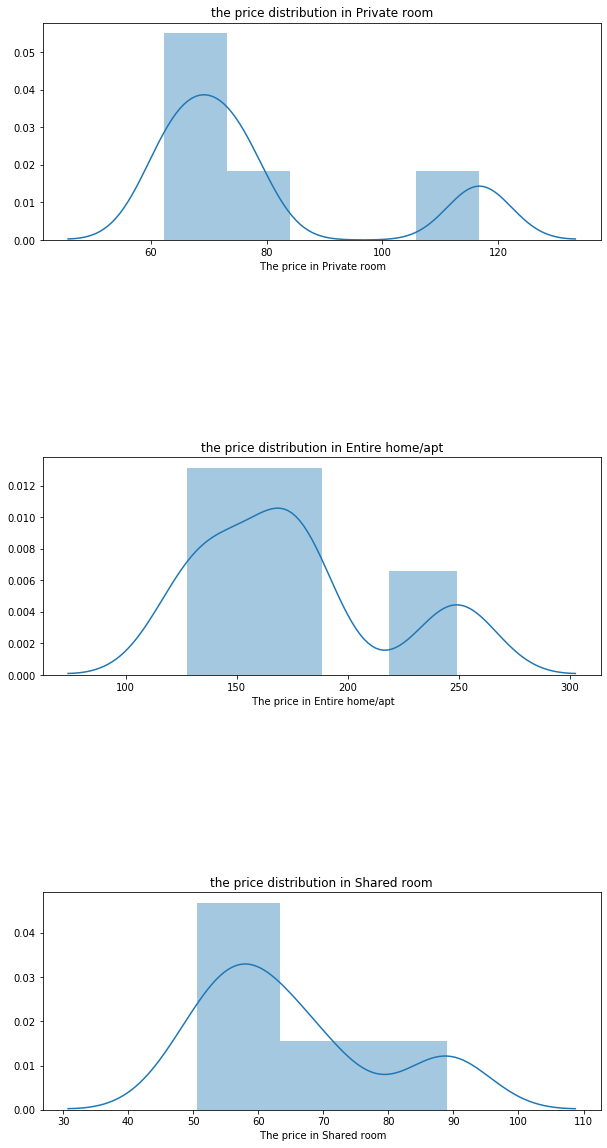

In [20]:
plot_price_room(df)

#### The realtionship between price and another numeric feature

To explore this relationship, we will use this function

In [21]:
def price_relation(df, disc_var, max_val, min_val, step):
    '''
    This function exploes the relationship between the price and any other numeric feature
    This function restricts the values of price from 0 to 200
    inputs:
    df -> the cleaned dataframe
    disc_var -> the numeric(discrete) feature
    max_val -> the maximum value of the numeric feature used in the plot
    min_val -> the minimum value of the numeric feature used in the plot
    step -> the step between two values in the plot
    
    outputs:
    plotting the heatmap plot to discover many insights from it
    '''
    
    plt.figure(figsize = [12, 5])

    # left plot: scatterplot of discrete data with jitter and transparency
    plt.subplot(1, 2, 1)
    sns.regplot(data = df, x = 'price', y = disc_var, fit_reg = False,
               x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

    # right plot: heat map with bin edges between values
    plt.subplot(1, 2, 2)
    bins_x = np.arange(0, 200+.5,20)
    bins_y = np.arange(min_val, max_val+1, step)
    plt.hist2d(data = df, x = 'price', y = disc_var, cmin = .5,
               bins = [bins_x, bins_y])
    plt.colorbar();

#### The Relationship Between Price And Minimum Nights 

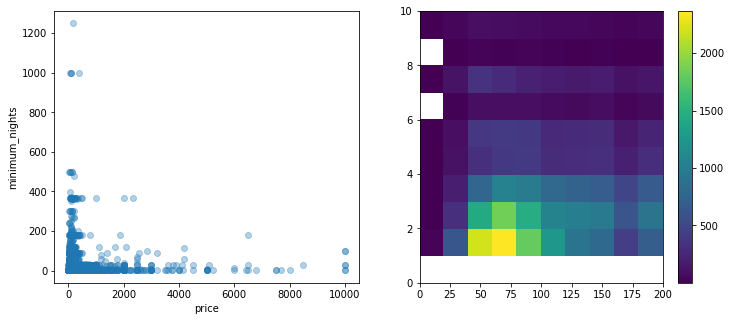

In [22]:
price_relation(df, 'minimum_nights', 10, 0, 1)

#### The Relationship Between Price And Availability

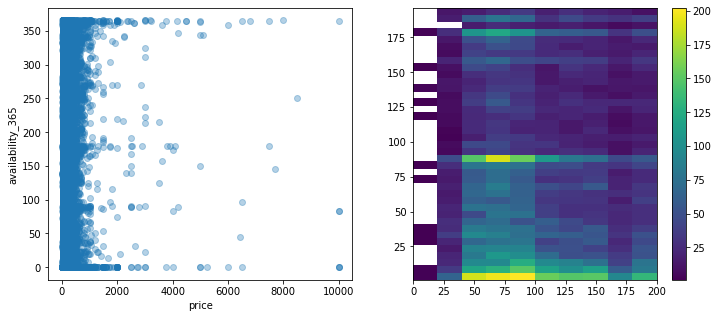

In [23]:
price_relation(df, 'availability_365', 200, 1, 5)

#### The Relationship Between Price And Number Of Reviews

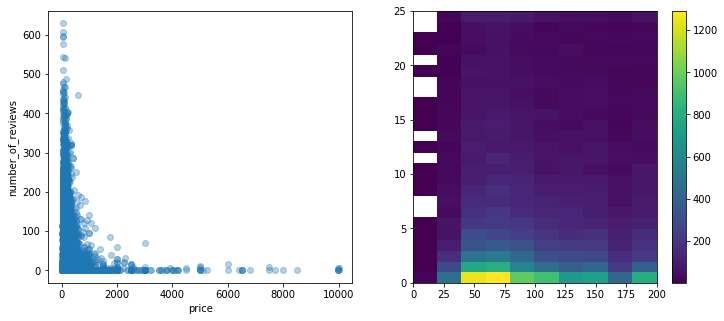

In [24]:
price_relation(df, 'number_of_reviews', 25, 0, 1)


### Multivariate Exploration

This function will be used to explore the relationship between prica and another numeric feature according to neighbourhood group and the room type

In [25]:
def multiexplore(df, disc_var):
    '''
    This function explores the relationship between price and 
    another numeric feature(minimum nights, number of reviews, availability) according to
    every neighbourhood and every room type
    
    inputs:
    df -> the cleaned dataframe
    disc_var -> the numeric(discrete) feature
    
    output:
    plotting the scatterplots
    '''
    g = sns.FacetGrid(data = df, col = 'room_type', row = 'neighbourhood_group', size = 2.5,
                    margin_titles = True)
    g.map(plt.scatter, 'price', disc_var)
    g.fig.set_size_inches(15,20)


#### the relationship between price and minimum nights related to every neighbourhood and every room type

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


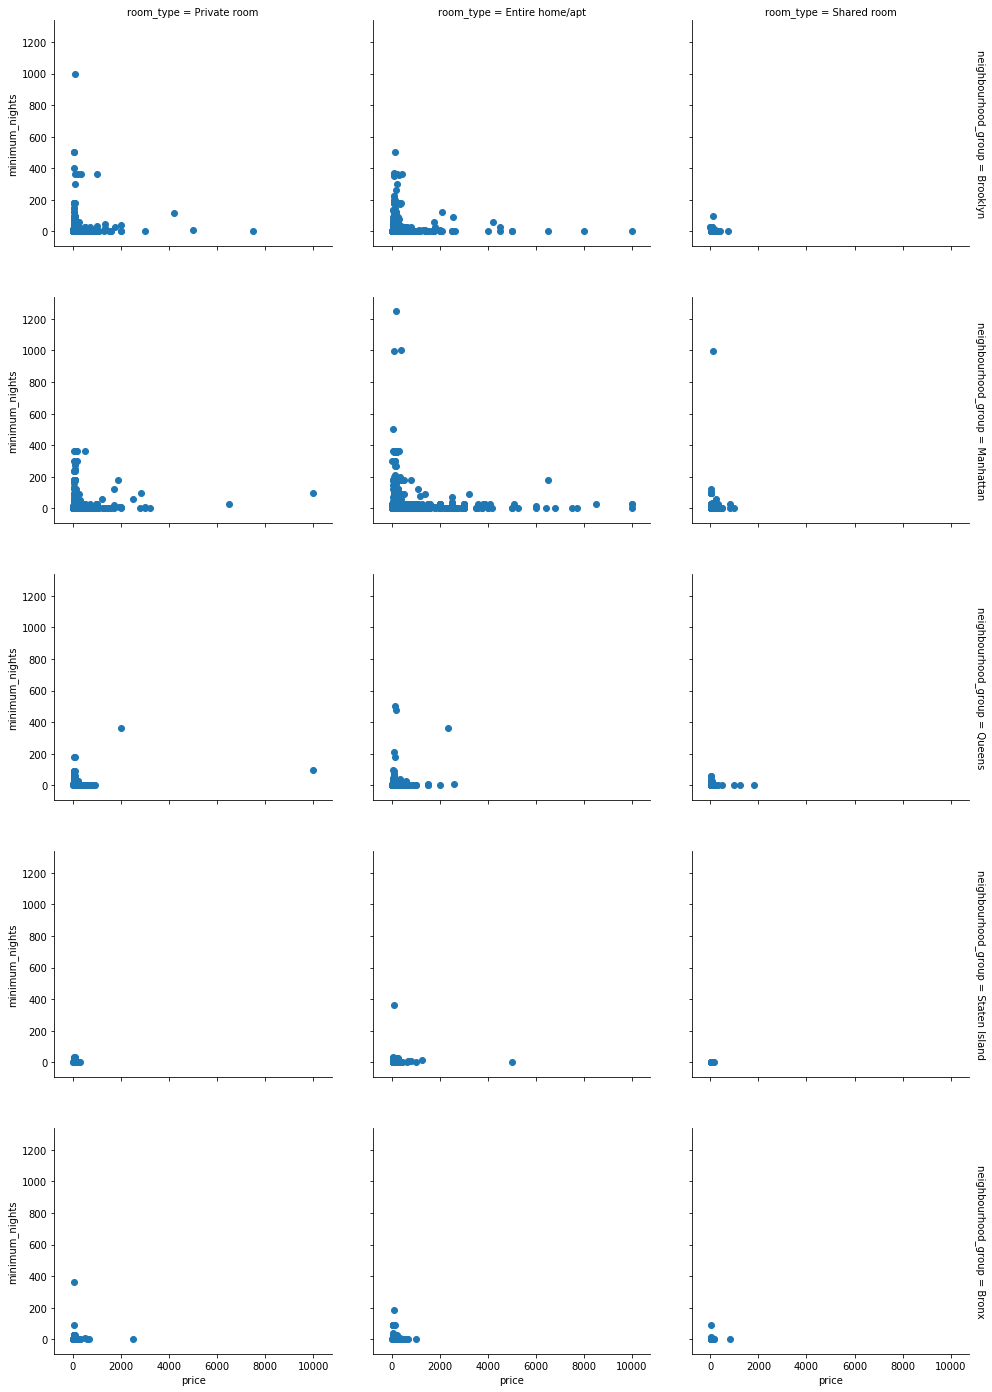

In [26]:
multiexplore(df, 'minimum_nights')

#### the relationship between price and number_of_reviews related to every neighbourhood and every room type

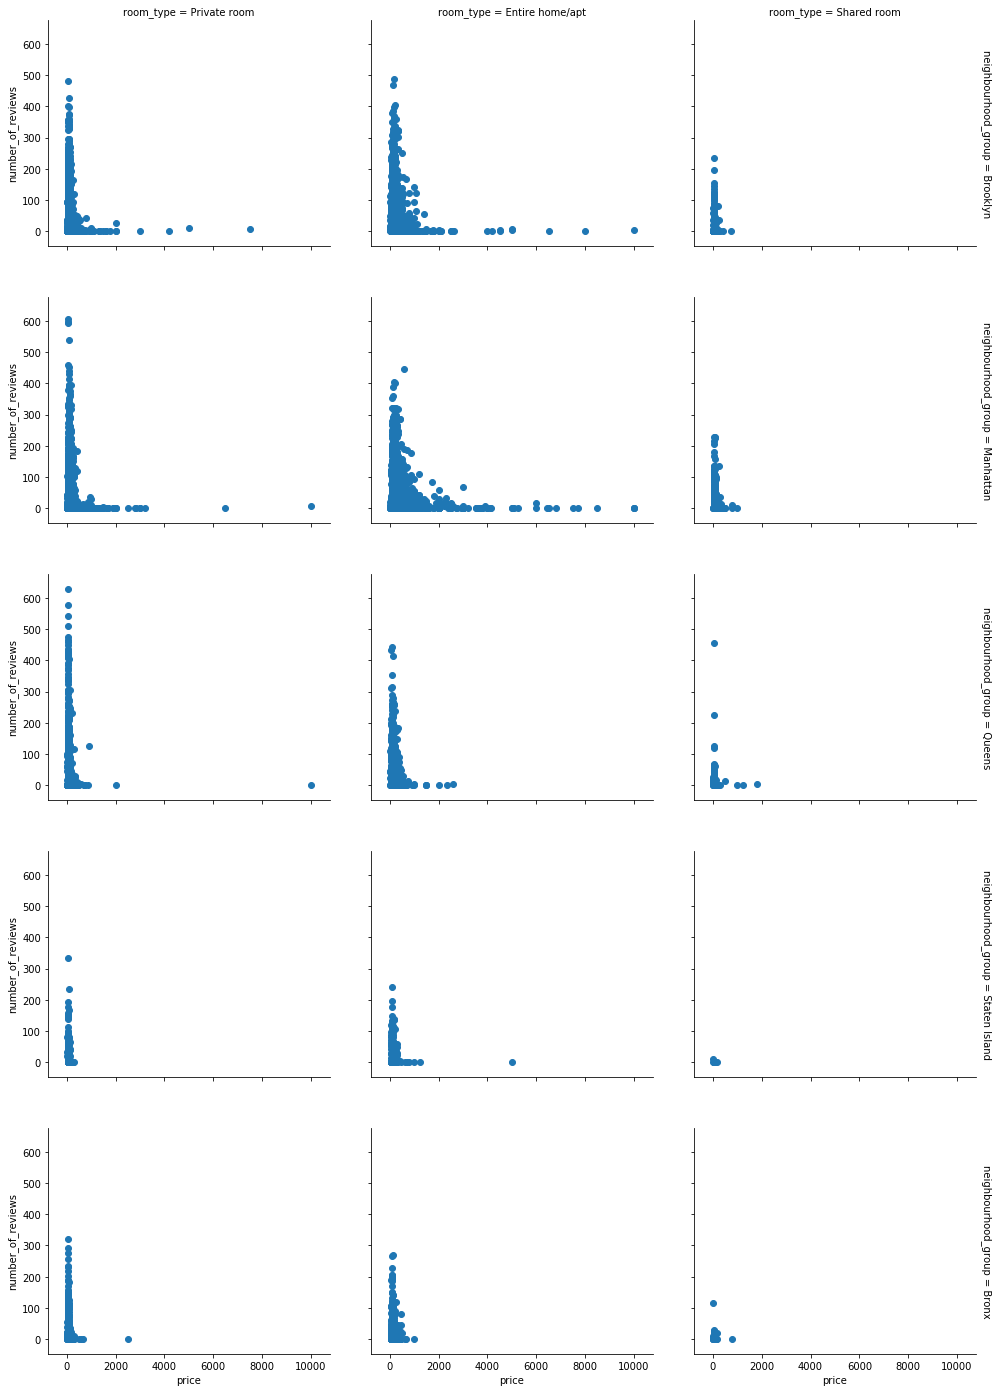

In [27]:
multiexplore(df, 'number_of_reviews')

### Explanatory Visualization(visualize)



In [94]:
def explan_price(df):
    '''
    This function shows a visualization for the relationship between price, neighbourhood group, and room type
    
    inputs:
    df -> the cleaned dataframe
    outputs:
    the line visualization
    '''
    plt.figure(figsize = [8,6])

    ax = sns.pointplot(data = df, x = 'room_type', y = 'price', hue = 'neighbourhood_group')
    ax.set_yticklabels([0,400,50], minor = True)
    plt.title('The price range in every neighbourhood group for every room type', fontsize = 16)
    plt.xlabel('Room Type',fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    ax.set_ylim(0,400)
    ax.set_yticks(range(0,450, 50))
    plt.show();

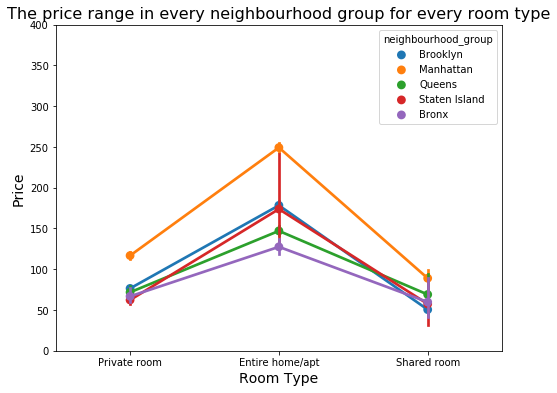

In [95]:
explan_price(df)

### Making  Predictions(Model)

Here, I will use many of features to predict the price, after doing many iterations with adding and removing features from the model, to make the best model that give us the highest R Squared, I arrived to the model that gave me 0.1 value.

In [30]:
def create_dummy_df(df, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols and unwanted columns in the prediction
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    df.drop(['host_name', 'id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
         'reviews_per_month', 'calculated_host_listings_count'], axis =1, inplace = True)
    cat_cols = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [31]:
def price_pred(df):
    '''
    This function for predicting the price using these features:
    neighbourhood_group, room_type, minimum_nights, number_of_reviews, availability_356
    INPUT:
    df -> the cleaned dataframe
    OUTPUT:
    printing the r-squared score for our model
    '''
    df = create_dummy_df(df, dummy_na=False)

    X = df.drop('price', axis =1)
    y = df['price']

    scaler = StandardScaler() #scaling all the features using the normalization
    scaled_X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.25)#splitting the data to train and test data

    model = LinearRegression() #instantiate the model
    model.fit(X_train,y_train) #fit the model

    y_test_preds = model.predict(X_test) #predict the test values
    print("The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))    

In [32]:
price_pred(df)

The r-squared score for the model was 0.0830697332655077 on 12224 values.


the best model to predict the price of the listing is by using  the room type, neighborhood group, minimum nights, number of reviews and the availability features, but these features are contribute in 10% from the price of the listing. that the r-squared is only 0.1 .


### Which neighbourhood has the highest number of reviews, and the highest number of rooms for every neighbourhood group?

To answer this question, we'll use the `neighbourhood_group`, `neighbourhood`, and `number_of_reviews` columns

In [33]:
#reading the dataframe again and cleaning it (because of the changes in the dataframe happened for prediction)
df = pd.read_csv('./AB_NYC_2019.csv' )
df = clean(df)

In [83]:
def highest_reviews_rooms(df):
    '''
    INPUT:
    df -> the cleaned dataframe
    
    OUTPUT:
    df_max_reviews -> a dataframe holds the names of neighbourhood_group,neighbourhoods that
                      have the highest number of reviews in every group
    df_max_rooms ->   a dataframe holds the names of neighbourhood_group,neighbourhoods that
                      have the highest number of rooms in every group 
                      
    '''
    df_group_reviews = df.groupby(['neighbourhood_group', 'neighbourhood']).sum()['number_of_reviews'].to_frame().reset_index()
    df_max_reviews = df_group_reviews.groupby('neighbourhood_group').max()[['neighbourhood','number_of_reviews']].reset_index()
        
    df_group_count = df.groupby(['neighbourhood_group', 'neighbourhood']).count()['id'].to_frame().reset_index()
    df_max_rooms = df_group_count.groupby('neighbourhood_group').max()[['neighbourhood','id']].reset_index().rename(columns = {'id':'number of listings'})
        
    return df_max_reviews, df_max_rooms

In [84]:
#print the two tables which have the names of neighbourhoods 
#that have the highest number of reviews, rooms in every group
print(highest_reviews_rooms(df)[0], '\n')
print(highest_reviews_rooms(df)[1])



  neighbourhood_group    neighbourhood  number_of_reviews
0               Bronx         Woodlawn               2542
1            Brooklyn  Windsor Terrace             110352
2           Manhattan     West Village              75962
3              Queens         Woodside              19310
4       Staten Island          Woodrow               2400 

  neighbourhood_group    neighbourhood  number of listings
0               Bronx         Woodlawn                  70
1            Brooklyn  Windsor Terrace                3920
2           Manhattan     West Village                2658
3              Queens         Woodside                 900
4       Staten Island          Woodrow                  48
